## 1. 두 집단 평균 차이 검정

In [21]:
import numpy as np
import pandas as pd
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt

##stats을 사용하기 위해서는 scipy import 필요 !
## scipy -> p밸류 값 구할수 있음

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df['race/ethnicity'].unique()#.tolist()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df_A = df[df['race/ethnicity']=='group A']
df_B = df[df['race/ethnicity']=='group B']
df_C = df[df['race/ethnicity']=='group C']
df_D = df[df['race/ethnicity']=='group D']
df_E = df[df['race/ethnicity']=='group E']

In [10]:
df_A

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
13,male,group A,some college,standard,completed,78,72,70
14,female,group A,master's degree,standard,none,50,53,58
25,male,group A,master's degree,free/reduced,none,73,74,72
46,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
974,female,group A,some college,standard,none,54,63,67
983,female,group A,some college,standard,completed,78,87,91
985,male,group A,high school,standard,none,57,51,54
988,female,group A,some high school,free/reduced,none,44,45,45


In [11]:
df_B

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80
976,male,group B,some college,free/reduced,completed,60,62,60
980,female,group B,high school,free/reduced,none,8,24,23
982,male,group B,some high school,standard,completed,79,85,86


In [12]:
# 두 집단의 수학점수 차이
df_A_math = df_A['math score']
df_B_math = df_B['math score']

In [17]:
# A집단 수학점수 평균
df_A_mean = np.mean(df_A_math)
print(df_A_mean)

# A집단 수학점수 분산
df_A_var = np.std(df_A_math)**2
print(df_A_var)

# A집단의 수
n1 = len(df_A_math)
print(n1)

61.62921348314607
208.54791061734636
89


In [18]:
# B집단 수학점수 평균
df_B_mean= np.mean(df_B_math)
print(df_B_mean)

# B 집단 수학점수 분산
df_B_var = np.std(df_B_math)**2
print(df_B_var)

# B집단의 수
n2 = len(df_B_math)
print(n2)

63.45263157894737
238.00565096952914
190


In [19]:
# 분포 전체
s = ((df_A_var/n1)+ (df_B_var/n2))**0.5
print(s)

1.8962848603648554


In [20]:
# Z 값(적분값 = 넓이)
z_value = (df_B_mean - df_A_mean)/s
print(z_value)

0.9615739353898896


In [23]:
# p-value 
z_dist = stats.norm(0,1) # 평균=0, 분산 = 1인 정규분포
p_value = 1- z_dist.cdf(z_value) # 확률 전체 합= 1
p_value

## p_value 가 0.05보다 크기 때문에 두 집단간의 차이 없음 ! (H0 채택)
## p 밸류가 낮을 수록(p_value<0.05) H1(내 가설) 채택할 확률이 높아짐 !

### cdf(cumulative distribution function) = 누적분포 함수 

0.16813183477339466

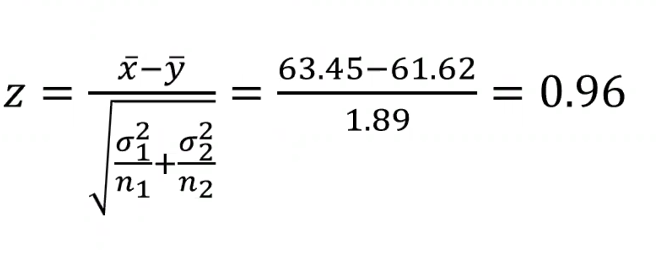

## 2. 세 집단 평균차이 검정

In [24]:
df_A_math = df_A['math score']
df_B_math = df_B['math score']
df_C_math = df_C['math score']
df_D_math = df_D['math score']
df_E_math = df_E['math score']